In [1]:
import numpy as np
import glob
import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline
import re
import scipy.stats

In [8]:
inputDirs = {    
    'Encoder-decoder': '../../train/recon/n2n_2d/model/encoder_decoder_depth_4/', 
    'UNet': '../../train/recon/n2n_2d/model/unet_depth_4/', 
    'ResNet': '../../train/recon/n2n_2d/model/resnet_depth_9/', 
    
}

In [9]:
subSlices = [2, 16, 26, 54, 55, 73, 75, 86, 93, 95]

In [10]:
rmseAll = {}

for k in inputDirs:
    rmses = []
    
    for iSlice in subSlices:
        loss = np.load(os.path.join(inputDirs[k], str(iSlice), 'loss.npz'))['val']
        if loss.ndim == 0:
            rmses.append(float(loss))
        else:
            rmses.append(loss[-1,-1])

    rmses = np.array(rmses)
    
    rmseAll[k] = rmses

In [11]:
for k in rmseAll:
    print ('%s: %g, %g'%(k, np.mean(rmseAll[k]), np.std(rmseAll[k])))

Encoder-decoder: 0.0166749, 0.00231034
UNet: 0.0164386, 0.00244502
ResNet: 0.0166465, 0.00200634


In [15]:
for k in rmseAll:
    if k != 'Encoder-decoder':
        _, pVal = scipy.stats.ttest_rel(rmseAll['Encoder-decoder'], rmseAll[k])
        print (k, pVal)

UNet 0.020640790033663974
ResNet 0.8585894069655466


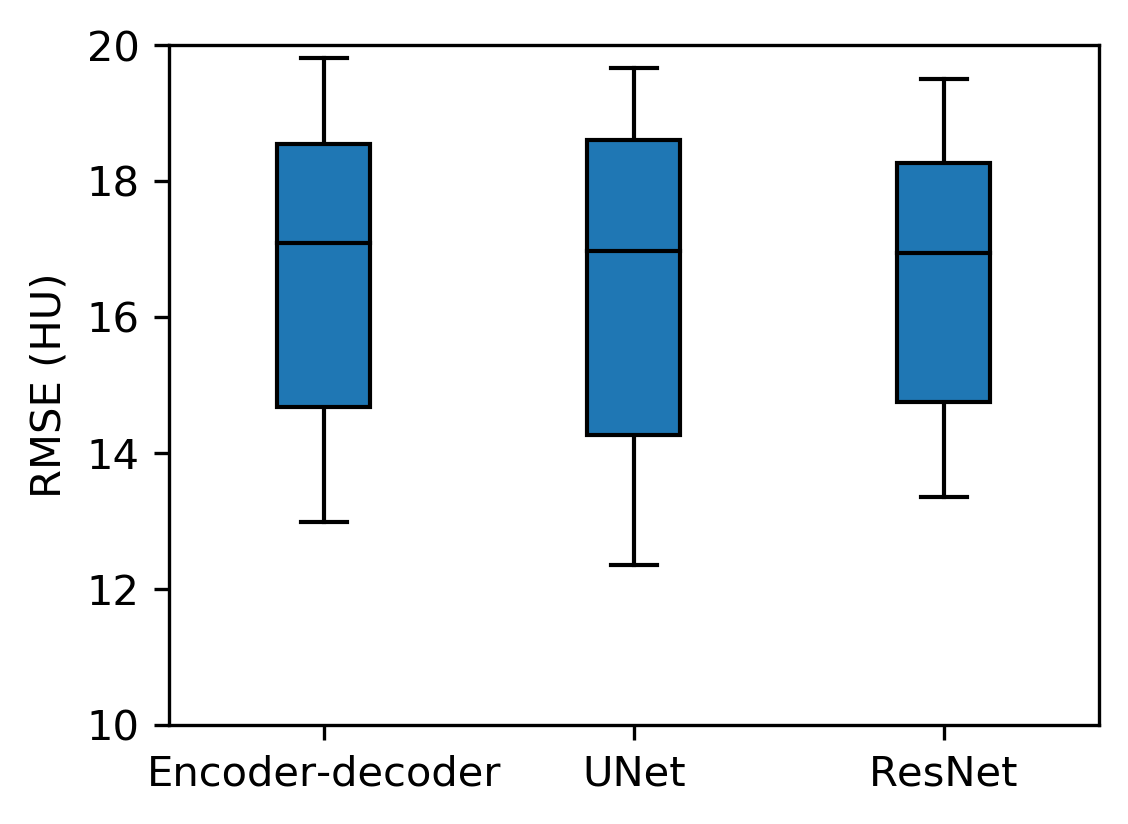

In [25]:
# boxplot
vals = []
for k in rmseAll:
    vals.append(rmseAll[k])
vals = np.array(vals)

color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
plt.figure(figsize=[4,3], dpi=300)
bplots = plt.boxplot(vals.T * 1000, patch_artist=True)
for median in bplots['medians']:
    median.set_color('black')

plt.xticks(range(1,len(rmseAll) + 1), list(rmseAll.keys()))
plt.ylabel('RMSE (HU)')
plt.ylim([10, 20])
# plt.title('Different Models with \n approximately same number of parameters')

plt.savefig('../../train/recon/eval/model.eps')